In [2]:
import pathlib
import os

pwd = pathlib.Path().absolute()
print(pwd)

rfml_dir = pwd.parent
base_dir = rfml_dir.parent

/Users/zephyr/Desktop/大四课程/Individual Project/03-Code/RF Signal Classification/RF_Classification/RF_Classification/rfml/tests


In [3]:
base_dir

PosixPath('/Users/zephyr/Desktop/大四课程/Individual Project/03-Code/RF Signal Classification/RF_Classification/RF_Classification')

In [4]:
# add rfml_dir to path
import sys
sys.path.append(str(base_dir))

In [12]:
rf_1024_data_log_dir = base_dir / "RF1024_data_log"
train_csv = rf_1024_data_log_dir / "train.csv"
valid_csv = rf_1024_data_log_dir / "valid.csv"

In [19]:
import pandas as pd

# not title for each column
train_df = pd.read_csv(train_csv, index_col=0, header=None)
valid_df = pd.read_csv(valid_csv, index_col=0, header=None)

In [20]:
train_df

,1,2
0,,
0,70.8125,0.866966
1,88.8250,0.569119
2,91.7375,0.446961
3,94.0000,0.378272
4,96.1750,0.325879
5,96.9125,0.287944
6,97.5625,0.258370
7,98.2000,0.233979
8,98.4500,0.213731


In [56]:
columns = ["train_acc", "train_loss", "valid_acc", "valid_loss"]

# new df
all_data_df = pd.DataFrame(columns=columns)

# add train_df and valid_df to all_data_df
all_data_df["train_acc"] = train_df[1]
all_data_df["train_loss"] = train_df[2]
all_data_df["valid_acc"] = valid_df[1]
all_data_df["valid_loss"] = valid_df[2]

In [57]:
all_data_df.iloc[0]

train_acc     70.812500
train_loss     0.866966
valid_acc     94.062500
valid_loss     0.308293
Name: 0, dtype: float64

In [58]:
all_data_df

,train_acc,train_loss,valid_acc,valid_loss
0,,,,
0,70.8125,0.866966,94.0625,0.308293
1,88.8250,0.569119,92.8750,0.237485
2,91.7375,0.446961,93.5000,0.196686
3,94.0000,0.378272,90.3125,0.234394
4,96.1750,0.325879,88.3125,0.269099
5,96.9125,0.287944,92.0625,0.249631
6,97.5625,0.258370,99.2500,0.218262
7,98.2000,0.233979,90.6875,0.228550
8,98.4500,0.213731,92.6875,0.215963


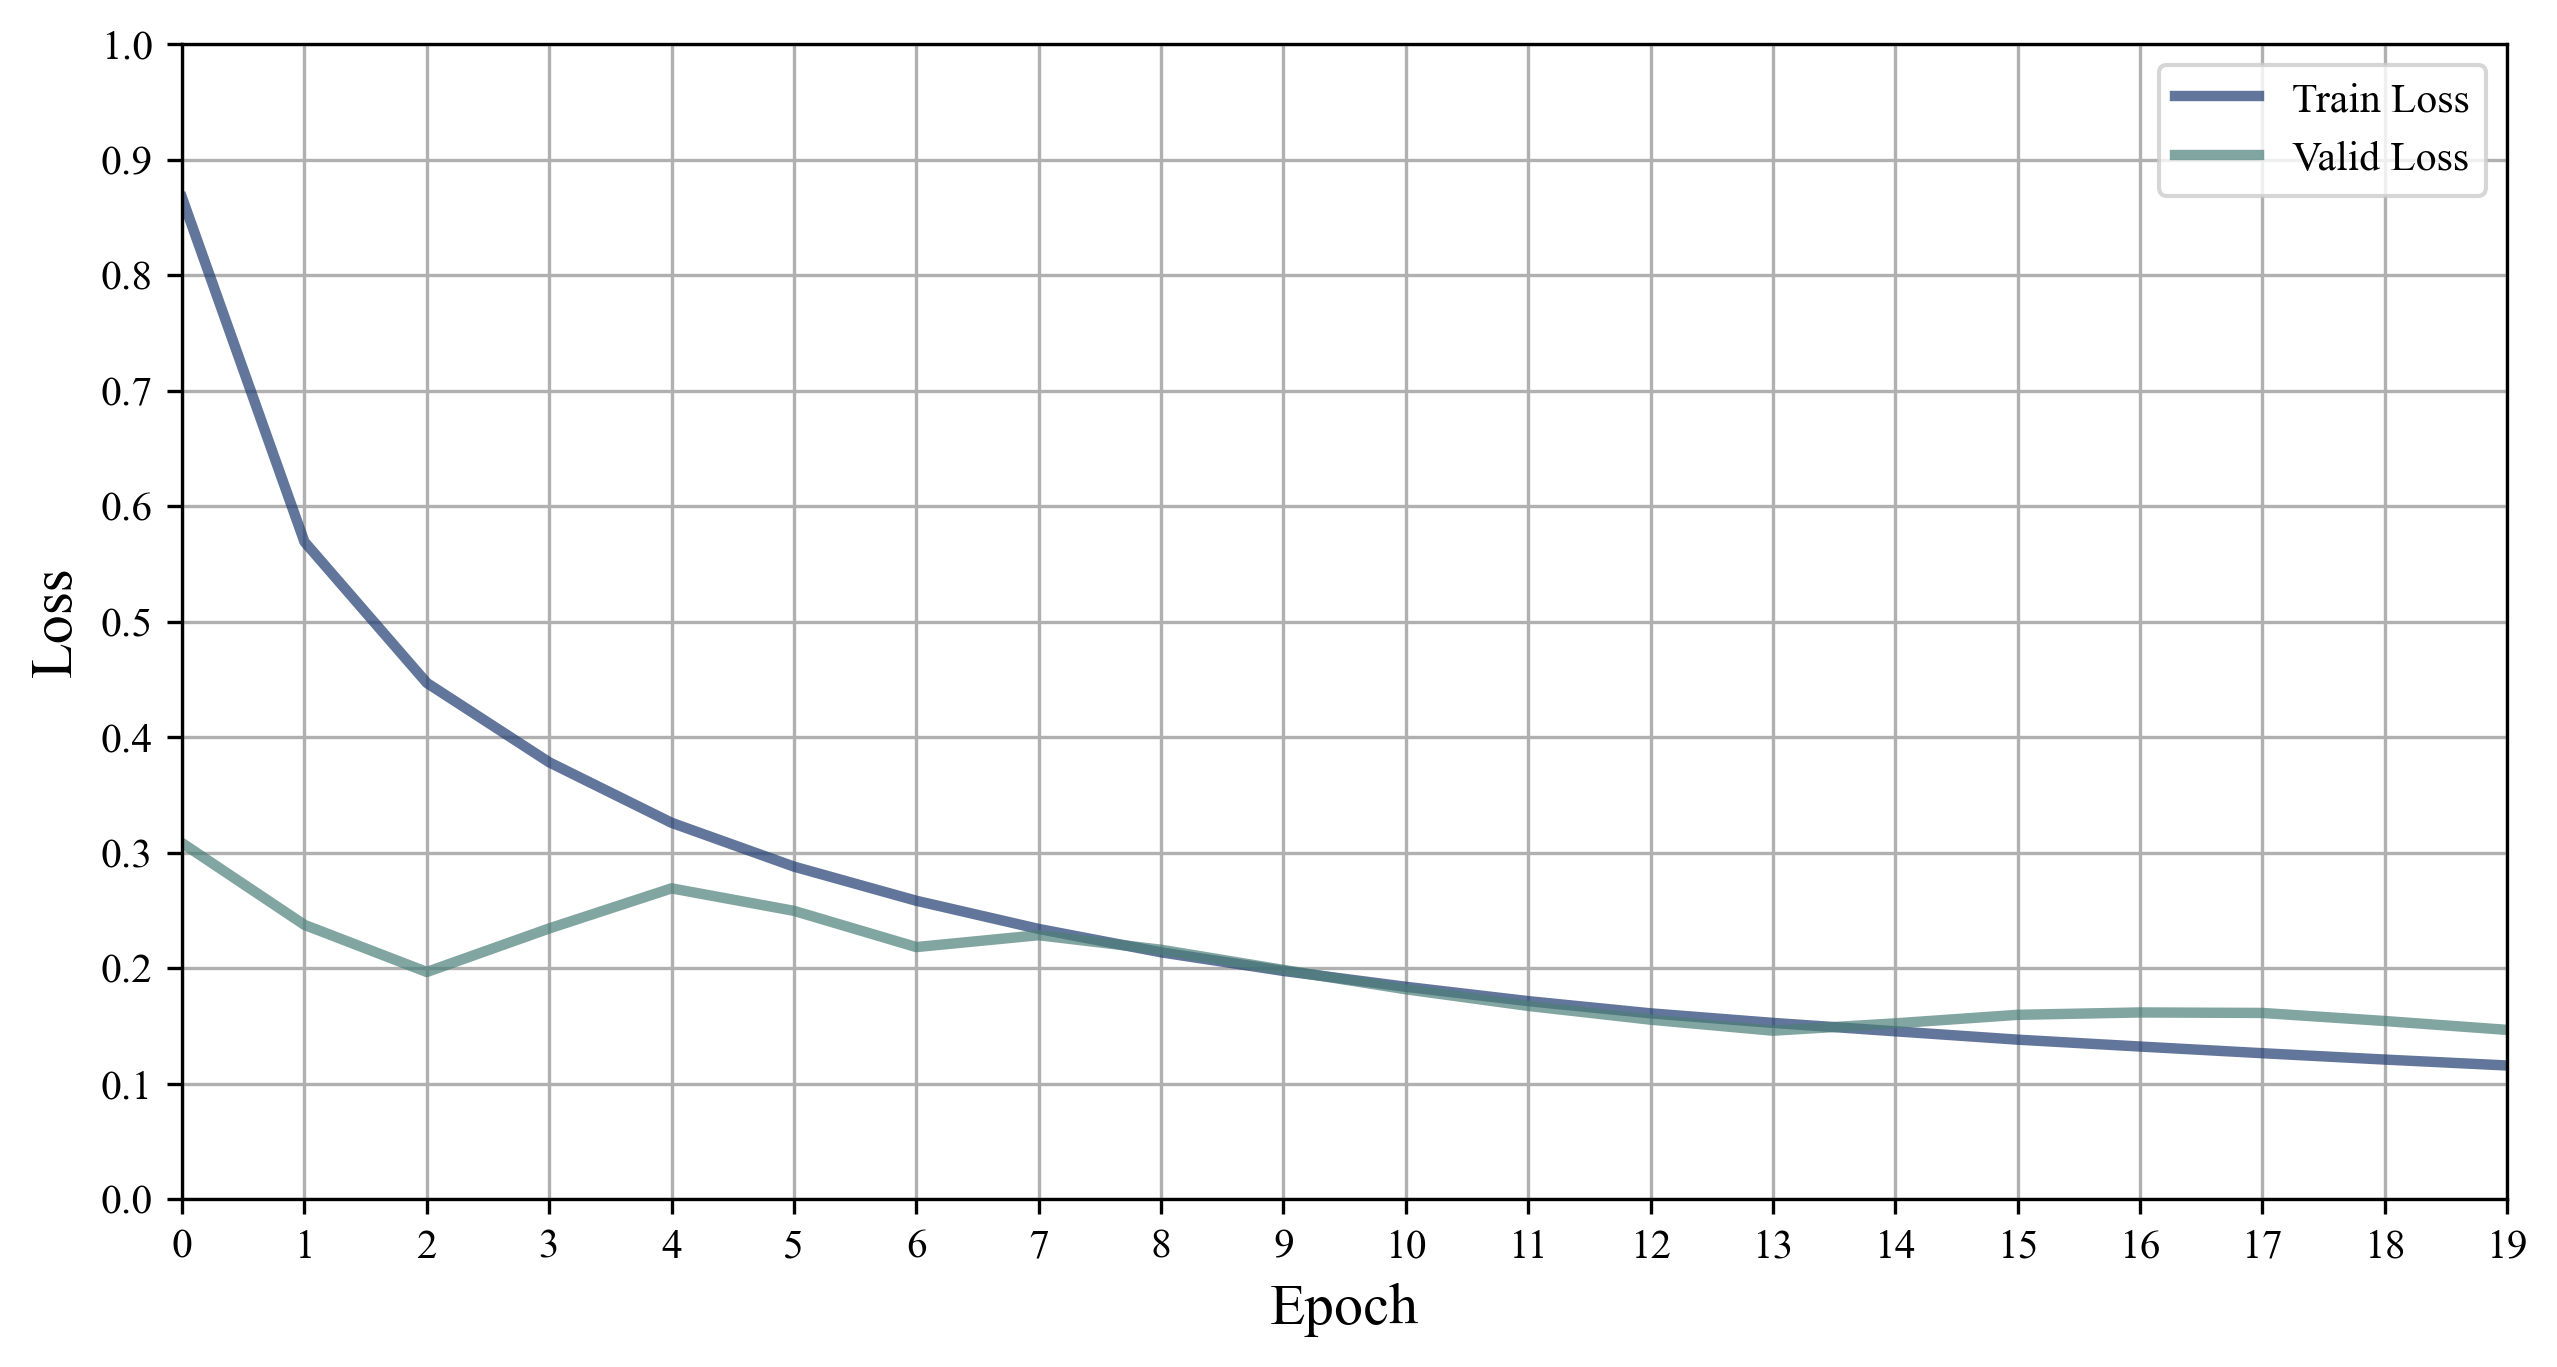

In [68]:
# use matlab to plot: train_loss and valid_loss vs epoch

import matplotlib.pyplot as plt

color_1 = "#203b71"
color_2 = "#4c7f78"
line_width = 2.5
alpha = 0.7
dpi = 300

# 画布大小
plt.figure(figsize=(10, 5) , dpi=dpi)

# font: times new roman
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True)

# x 轴显示整数，从0到19
# y 轴显示小数，从0到1,精度0.1， 每0.1一个刻度
plt.xticks(range(0, 20, 1))
plt.yticks([i * 0.1 for i in range(0, 11, 1)])

# 设置 x, y limit
plt.xlim(0, 19)
plt.ylim(0, 1)

# x 轴标签
plt.xlabel("Epoch", fontsize=14)
# y 轴标签
plt.ylabel("Loss", fontsize=14)

#线条颜色: #203b71, 粗细: 1.5
plt.plot(all_data_df["train_loss"], color=color_1, linewidth=line_width, label="Train Loss" , alpha=alpha)
plt.plot(all_data_df["valid_loss"], color=color_2, linewidth=line_width, label="Valid Loss" , alpha=alpha)
plt.legend()

# save
plt.savefig("loss_curve_rf1024_dpi_100.png", dpi=dpi)

plt.show()


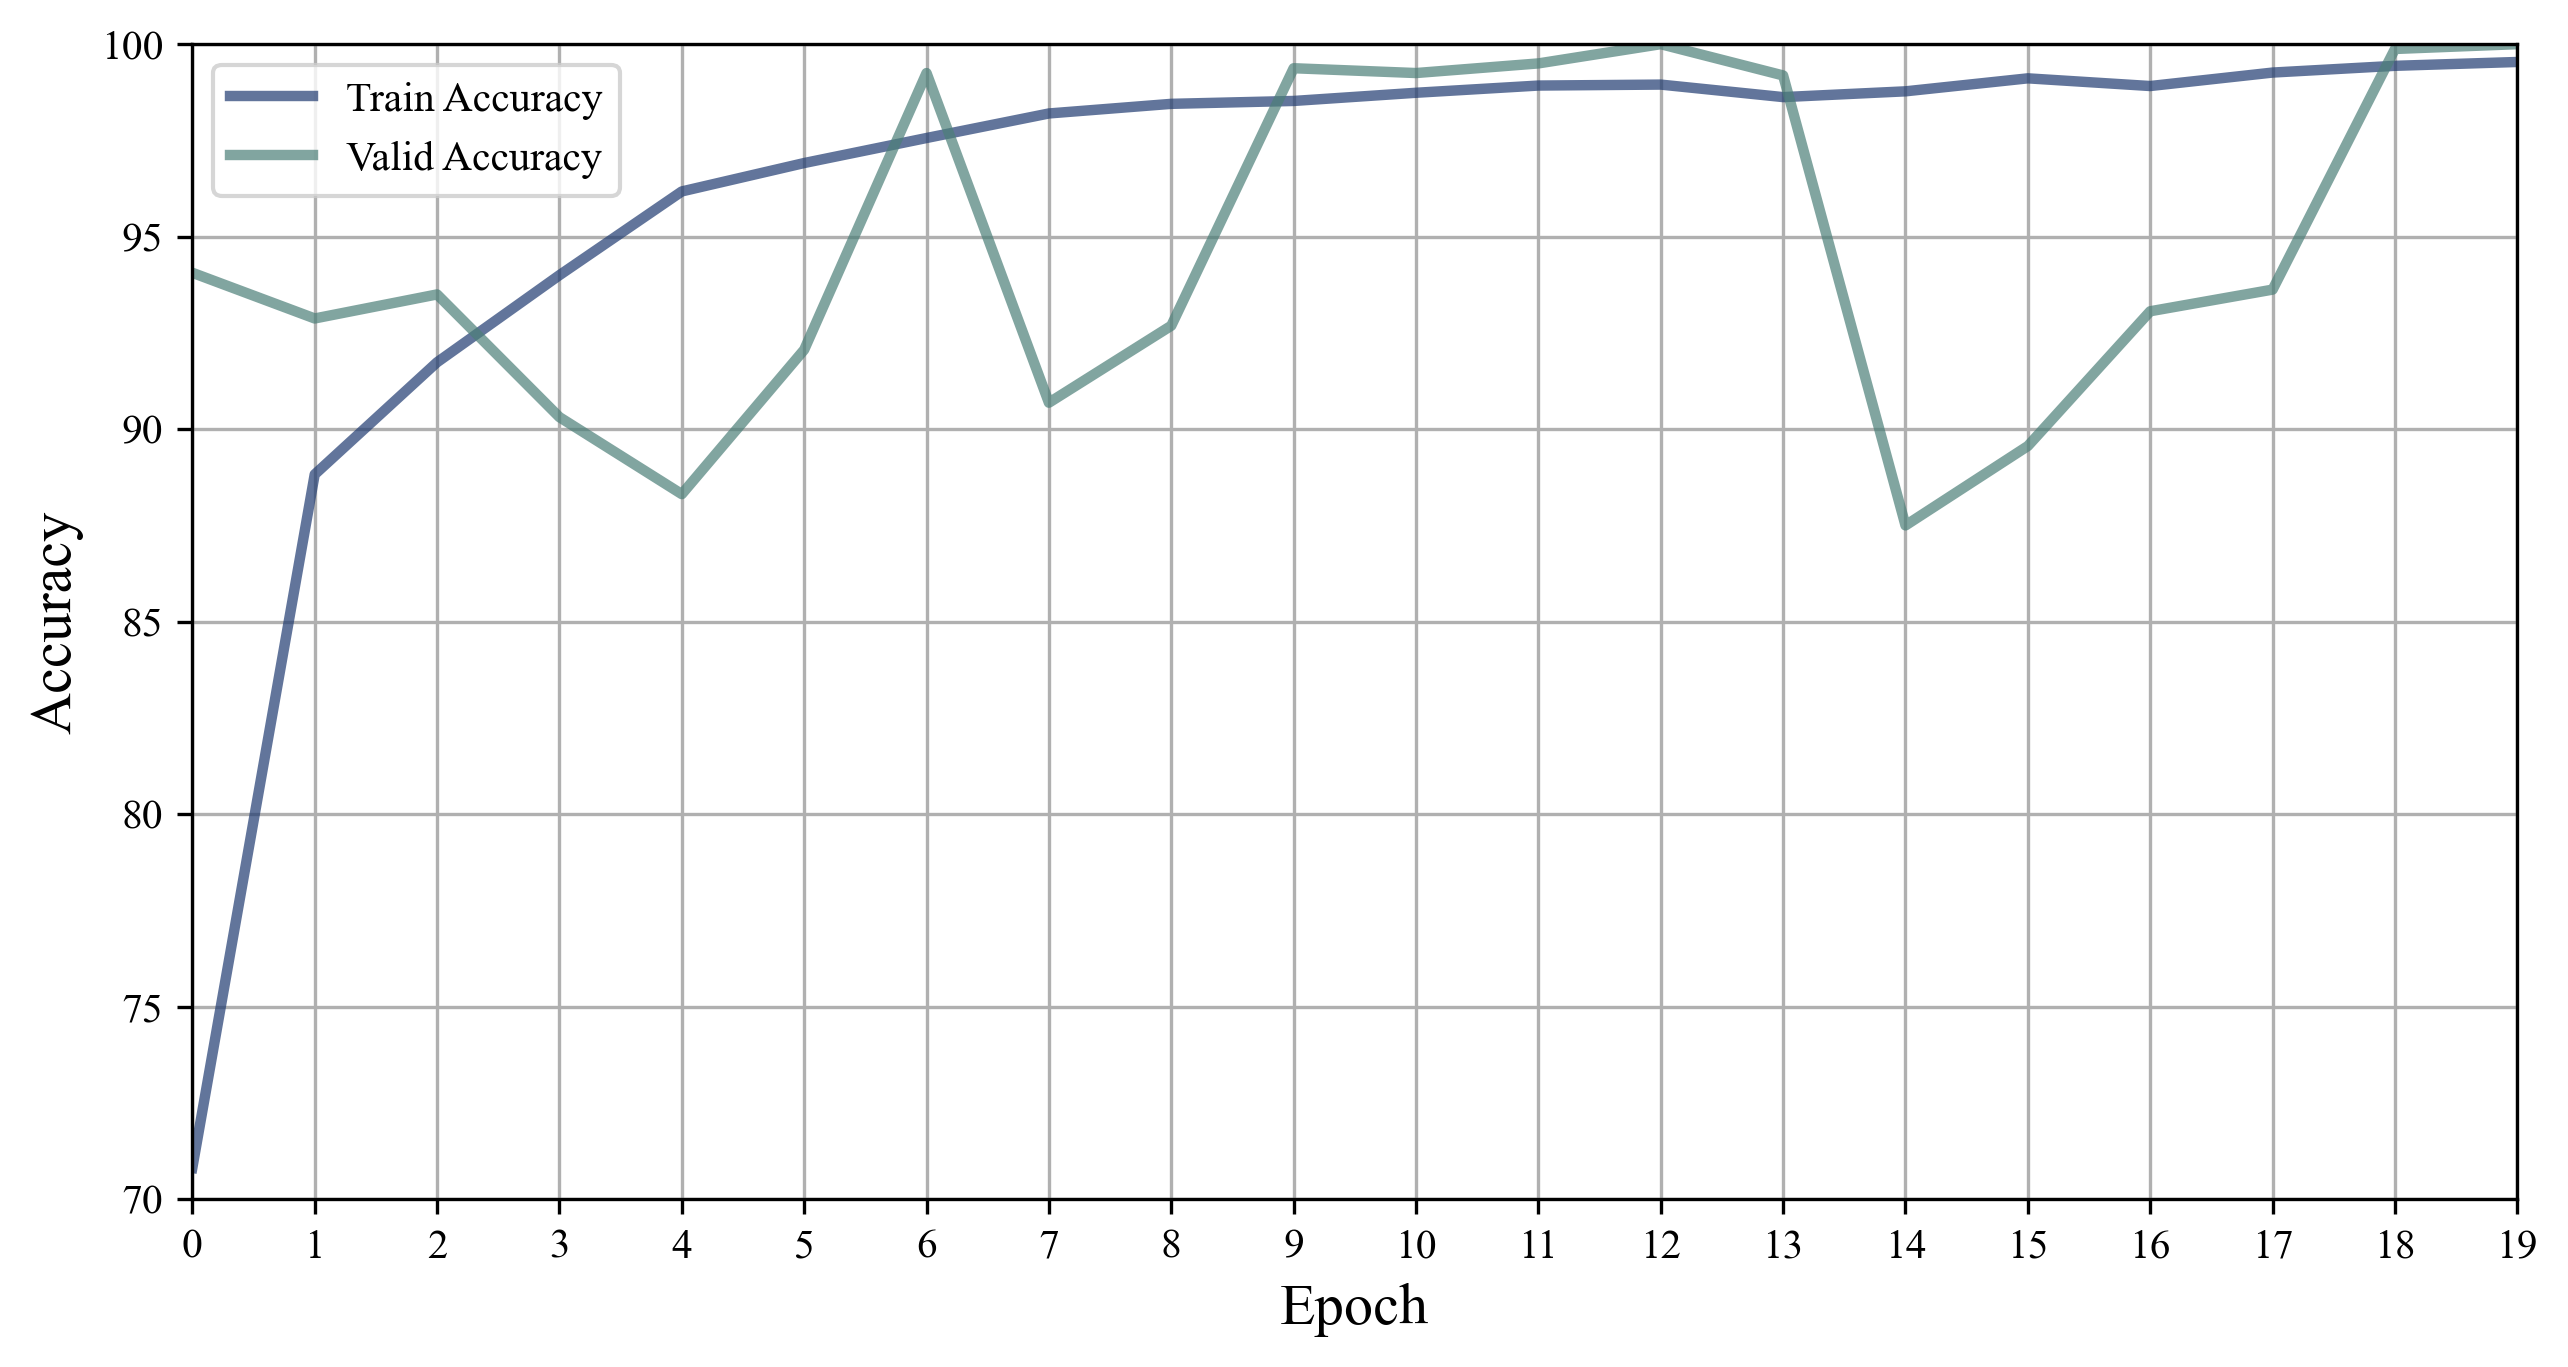

In [81]:
# use matlab to plot: train_acc and valid_acc vs epoch

import matplotlib.pyplot as plt

color_1 = "#203b71"
color_2 = "#4c7f78"
line_width = 2.5
alpha = 0.7
dpi = 300

# 画布大小
plt.figure(figsize=(10, 5) , dpi=dpi)

# font: times new roman
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True)

# x 轴显示整数，从0到19
# y 轴显示小数，从70到100
plt.xticks(range(0, 20, 1))
plt.yticks([i for i in range(70, 101, 5)])

# 设置 x, y limit
plt.xlim(0, 19)
plt.ylim(70, 100)

# x 轴标签
plt.xlabel("Epoch", fontsize=14)
# y 轴标签
plt.ylabel("Accuracy", fontsize=14)

#线条颜色: #203b71, 粗细: 1.5
plt.plot(all_data_df["train_acc"], color=color_1, linewidth=line_width, label="Train Accuracy" , alpha=alpha)
plt.plot(all_data_df["valid_acc"], color=color_2, linewidth=line_width, label="Valid Accuracy" , alpha=alpha)
plt.legend()

# save
plt.savefig("acc_curve_rf1024_dpi_100.png", dpi=dpi)

plt.show()